In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import nltk
%matplotlib inline


pd.set_option('display.max_columns',None)
from importlib import reload
plt=reload(plt)

In [3]:
ds=pd.read_csv('C:/Users/Dell E5470/Desktop/EDA practice projects/ds_salaries.csv')
ds.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
ds.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [5]:
ds.drop(ds[['Unnamed: 0','salary','salary_currency']],axis=1, inplace=True)

In [6]:
ds.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
print(ds.shape)

(607, 9)


In [ ]:
# number of experience levels

In [8]:
ds['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [ ]:
## the columns are vaguely labelled. lets rename them

In [9]:
ds['experience_level'].replace({'MI': 'Middle_Level', 'SE': 'Senior_Level','EN':'Entry_Level','EX':'Executive_Level'}, inplace=True)

In [ ]:
# company size categories

In [10]:
ds['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [12]:
### lets rename  them
ds['company_size'].replace({'L': 'Large', 'S': 'Small','M':'Midsize'}, inplace=True)

In [13]:
# employment type
ds['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [14]:
# lets renam them
ds['employment_type'].replace({'FT': 'Full_Time', 'CT': 'Contract','PT':'Part_Time','FL':'Freelance'}, inplace=True)

In [15]:
ds.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Middle_Level,Full_Time,Data Scientist,79833,DE,0,DE,Large
1,2020,Senior_Level,Full_Time,Machine Learning Scientist,260000,JP,0,JP,Small
2,2020,Senior_Level,Full_Time,Big Data Engineer,109024,GB,50,GB,Midsize
3,2020,Middle_Level,Full_Time,Product Data Analyst,20000,HN,0,HN,Small
4,2020,Senior_Level,Full_Time,Machine Learning Engineer,150000,US,50,US,Large


In [ ]:
#How do the experience levels compare to each other

In [17]:
Experience_level=ds['experience_level'].value_counts()
Experience_level

Senior_Level       280
Middle_Level       213
Entry_Level         88
Executive_Level     26
Name: experience_level, dtype: int64

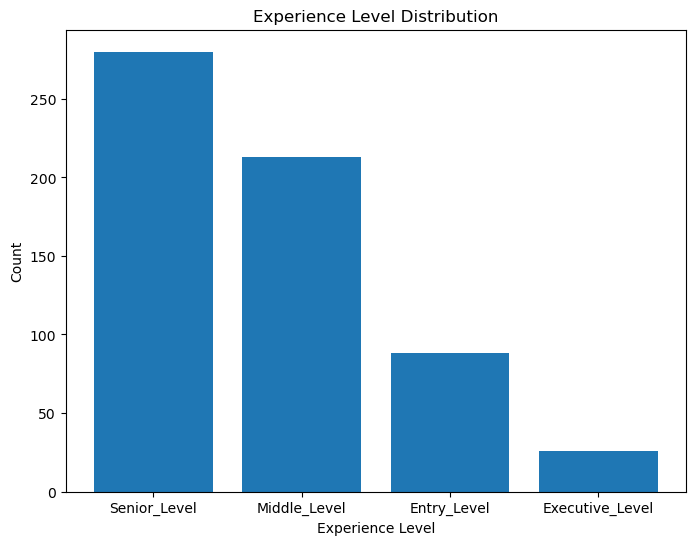

In [20]:
experience_data = {'Experience Level': ['Senior_Level', 'Middle_Level', 'Entry_Level', 'Executive_Level'],
                   'Count': [280, 213, 88, 26]}
df = pd.DataFrame(experience_data)

# Create the barplot
plt.figure(figsize=(8, 6))
plt.bar(df['Experience Level'], df['Count'])
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Experience Level Distribution')
plt.show()

In [21]:
# how many jobs titles are there in the dataset

ds['job_title'].nunique()

50

In [24]:
# what are the top ten common job titles

top_10_job_titles=ds['job_title'].value_counts()[:10]
top_10_job_titles

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: job_title, dtype: int64

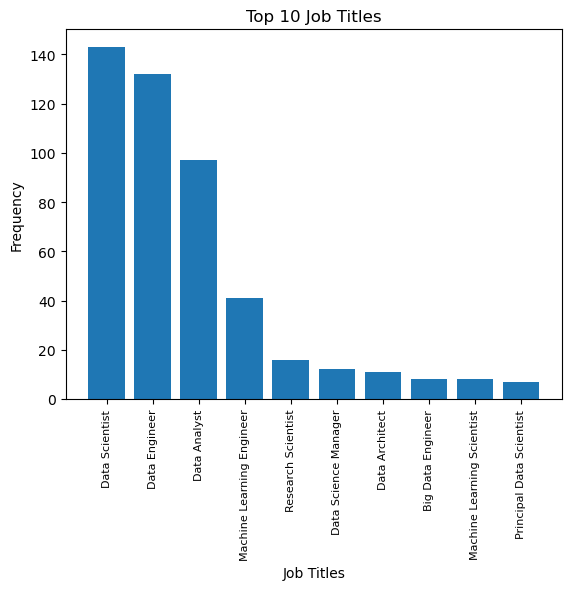

In [52]:
plt.bar(x=top_10_job_titles.index, height=top_10_job_titles.values)
plt.xticks(top_10_job_titles.index, rotation='vertical', size=8)
plt.title("Top 10 Job Titles")  # Change the title to "Top 10 Job Titles"
plt.xlabel("Job Titles")  # Add a label for the x-axis
plt.ylabel("Frequency")  # Add a label for the y-axis

plt.show()

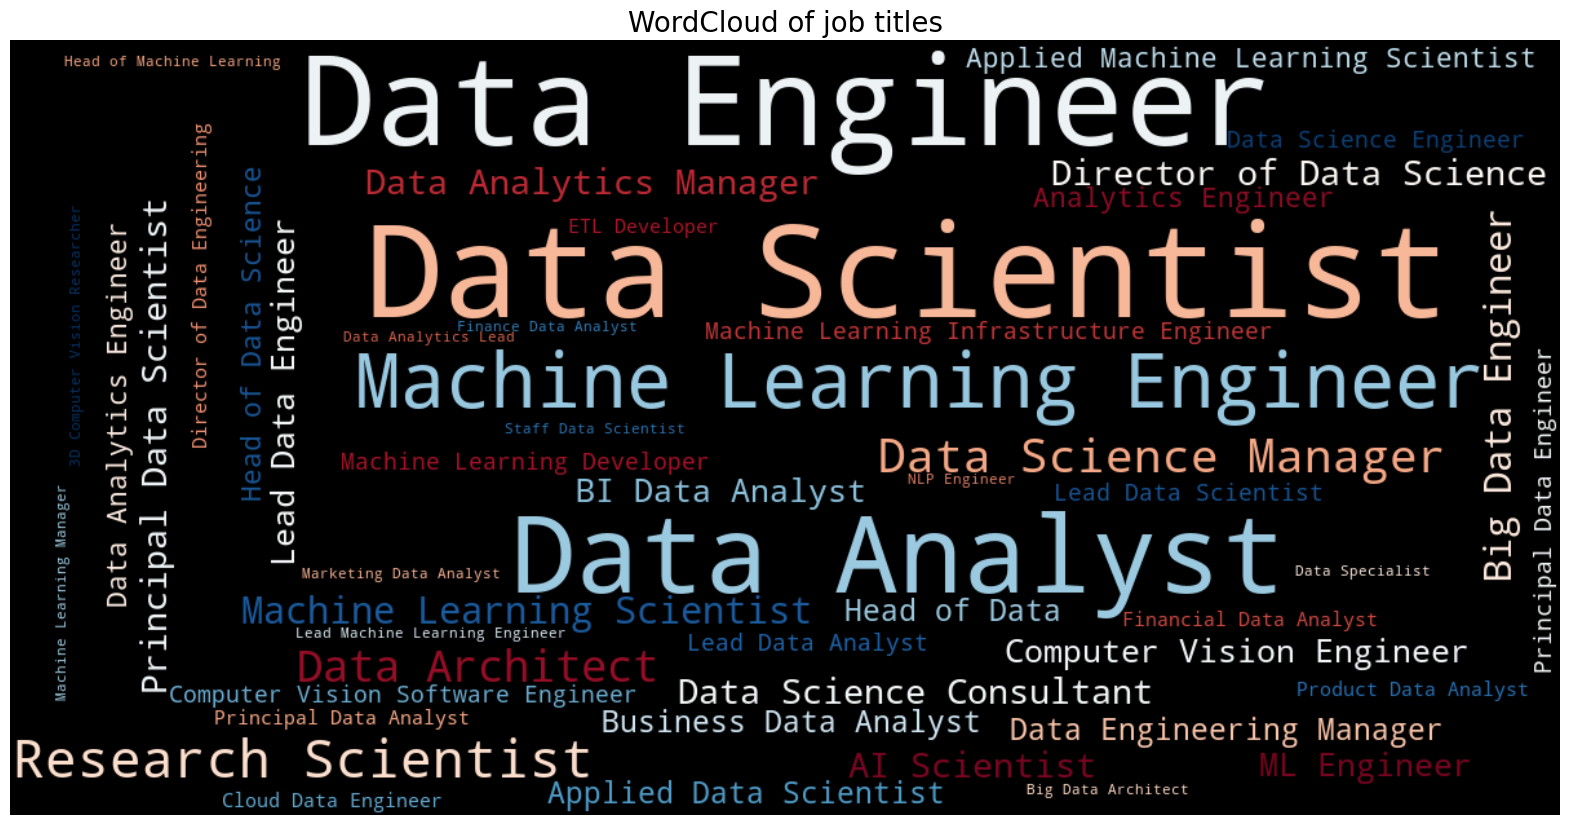

In [54]:
## wordcloud
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=1200, 
               height=600, 
               max_words=50,
               colormap= colormap,
               max_font_size = 100,
               random_state=88, 
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()
    
    
    
    
    
freq_df = Freq_df(ds['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'WordCloud of job titles')    

In [56]:
## employment type by distribution
employment_type=ds['employment_type'].value_counts()
employment_type

Full_Time    588
Part_Time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64

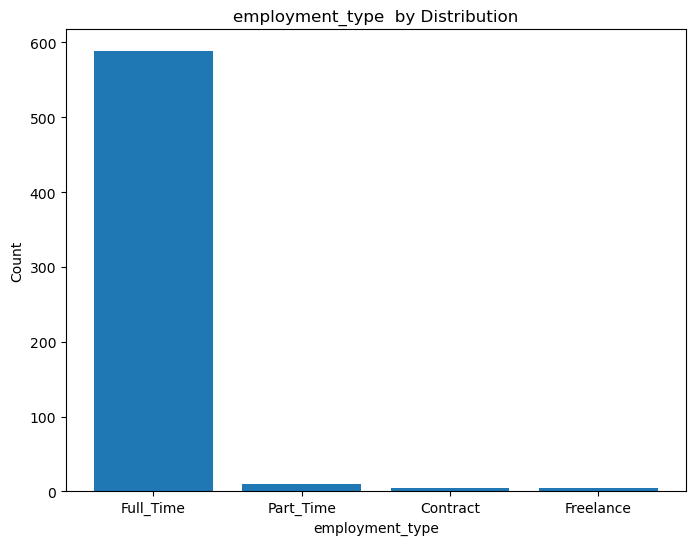

In [57]:
employment_type_data = {'employment_type': ['Full_Time', 'Part_Time', 'Contract', 'Freelance'],
                   'Count': [588, 10, 5, 4]}
df = pd.DataFrame(employment_type_data)

# Create the barplot
plt.figure(figsize=(8, 6))
plt.yticks()
plt.bar(df['employment_type'], df['Count'])
plt.xlabel('employment_type')
plt.ylabel('Count')
plt.title('employment_type  by Distribution')
plt.show()

In [59]:
## distribution of company size
comsize_dstribution=ds['company_size'].value_counts()
comsize_dstribution

Midsize    326
Large      198
Small       83
Name: company_size, dtype: int64

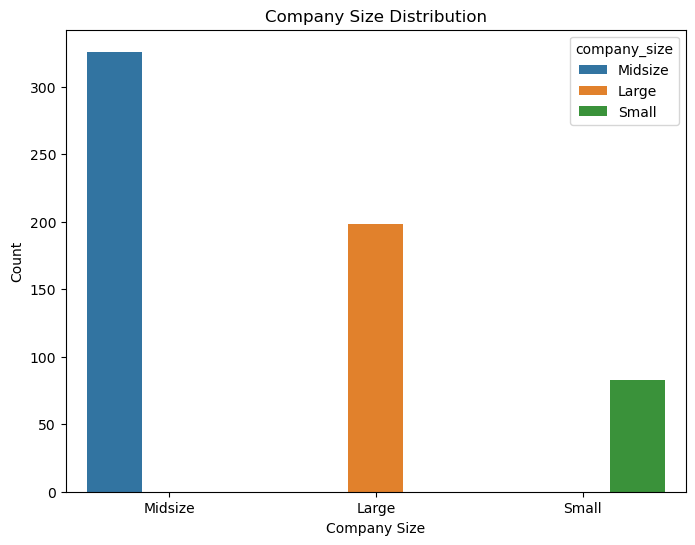

In [62]:
companysize_data = {'company_size': ['Midsize', 'Large', 'Small'],
                   'Count': [326, 198,83]}
df = pd.DataFrame(companysize_data)

# Create the barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='company_size', y='Count', hue='company_size', data=df)  # Modify 'count' to 'Count'
plt.title("Company Size Distribution")  # Add a title to the plot
plt.xlabel("Company Size")  # Add a label for the x-axis
plt.ylabel("Count")  # Add a label for the y-axis
plt.show()

In [65]:
## yearly work statistics
wkyear = ds['work_year'].value_counts()
wkyear

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

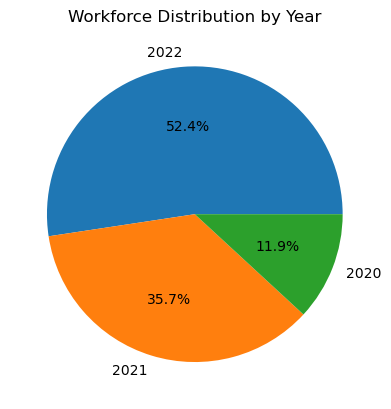

In [68]:
## lets plot
wkyear_data = {'year': ['2022', '2021', '2020'],
                   'Count': [318, 217,72]}
df = pd.DataFrame(wkyear_data)

plt.pie(df['Count'], labels=df['year'], autopct='%1.1f%%')
plt.title("Workforce Distribution by Year")  # Add a title to the chart
plt.show()

In [ ]:
## salary analysis

<AxesSubplot:ylabel='salary_in_usd'>

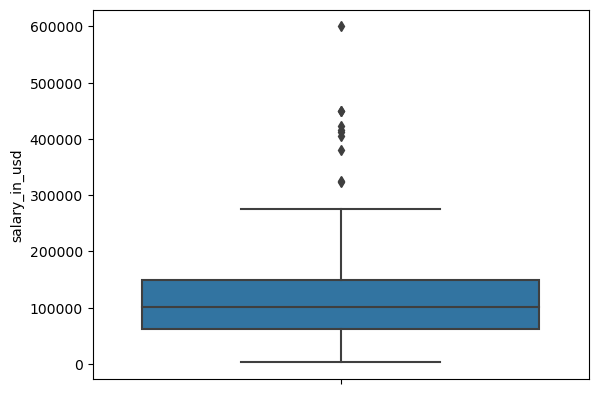

In [69]:
sns.boxplot(x=None,
    y='salary_in_usd',
    data=ds,
    width=0.8,)

In [ ]:
#  whats the salary distribution

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

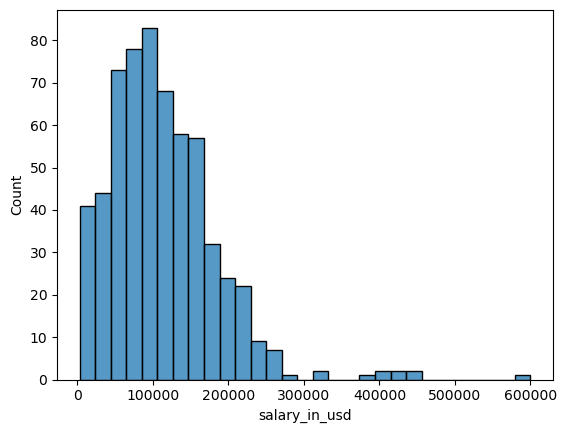

In [76]:
sns.histplot(data=ds, x='salary_in_usd')

In [ ]:
## whats the woek ratio

In [77]:
ds.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Middle_Level,Full_Time,Data Scientist,79833,DE,0,DE,Large
1,2020,Senior_Level,Full_Time,Machine Learning Scientist,260000,JP,0,JP,Small
2,2020,Senior_Level,Full_Time,Big Data Engineer,109024,GB,50,GB,Midsize
3,2020,Middle_Level,Full_Time,Product Data Analyst,20000,HN,0,HN,Small
4,2020,Senior_Level,Full_Time,Machine Learning Engineer,150000,US,50,US,Large


In [78]:
ds['remote_ratio'].value_counts()
#Remote Ratio consists of 3 values: 100, 50, 0.

# 0 No remote work 
# 50 hybrid
# 100 Fully remote

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

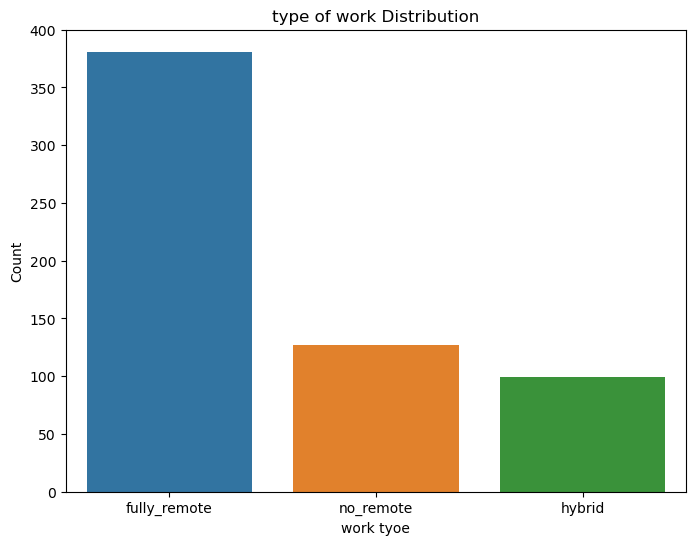

In [79]:
reomtework_data = {'remote_type': ['fully_remote', 'no_remote', 'hybrid'],
                   'Count': [381, 127,99]}
df = pd.DataFrame(reomtework_data)

# Create the barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='remote_type', y='Count', data=df)  # Modify 'count' to 'Count'
plt.title("type of work Distribution")  # Add a title to the plot
plt.xlabel("work tyoe")  # Add a label for the x-axis
plt.ylabel("Count")  # Add a label for the y-axis
plt.show()

In [ ]:
# experience level analysis

In [ ]:
## how is the experience level correlated with employment type

In [85]:
exlevel_type=ds.groupby(['experience_level','employment_type']).size()
exlevel_type

experience_level  employment_type
Entry_Level       Contract             2
                  Full_Time           79
                  Part_Time            7
Executive_Level   Contract             1
                  Full_Time           25
Middle_Level      Contract             1
                  Freelance            3
                  Full_Time          206
                  Part_Time            3
Senior_Level      Contract             1
                  Freelance            1
                  Full_Time          278
dtype: int64

<AxesSubplot:xlabel='experience_level'>

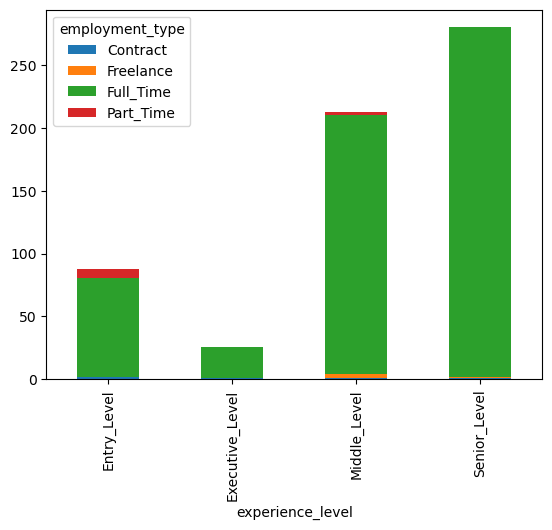

In [94]:
ds.groupby(['experience_level','employment_type']).size().unstack().plot(kind='bar', stacked=True)

In [ ]:
## job title by experience level

In [95]:
ds.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Middle_Level,Full_Time,Data Scientist,79833,DE,0,DE,Large
1,2020,Senior_Level,Full_Time,Machine Learning Scientist,260000,JP,0,JP,Small
2,2020,Senior_Level,Full_Time,Big Data Engineer,109024,GB,50,GB,Midsize
3,2020,Middle_Level,Full_Time,Product Data Analyst,20000,HN,0,HN,Small
4,2020,Senior_Level,Full_Time,Machine Learning Engineer,150000,US,50,US,Large


In [ ]:
## whats the relationship between company size and experience level

<AxesSubplot:xlabel='experience_level'>

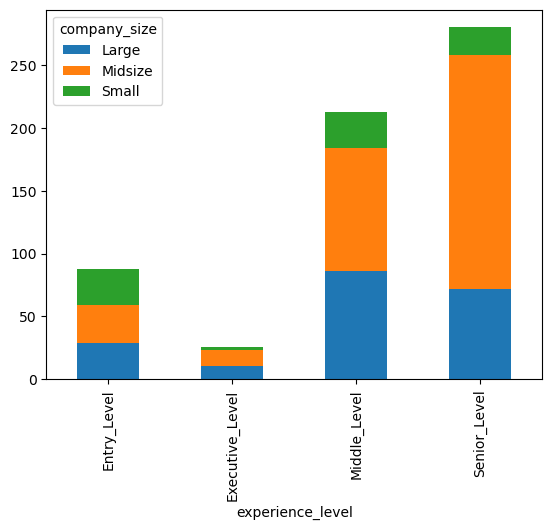

In [109]:
ds.groupby(['experience_level','company_size']).size().unstack().plot(kind='bar', stacked=True)

In [ ]:
## salary analysis

In [118]:
ds.head(2)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Middle_Level,Full_Time,Data Scientist,79833,DE,0,DE,Large
1,2020,Senior_Level,Full_Time,Machine Learning Scientist,260000,JP,0,JP,Small


In [ ]:
## salary by work year

In [152]:
salary_year=ds.groupby(['work_year','salary_in_usd']).size().unstack()
salary_year=pd.DataFrame(salary_year)

In [17]:
px.violin(ds,x='work_year',y='salary_in_usd',color='work_year',labels={'work_year':'year','salary_in_usd':'salary in usd'},template='seaborn',title='<b>Data Science Salaries by year')

<AxesSubplot:>

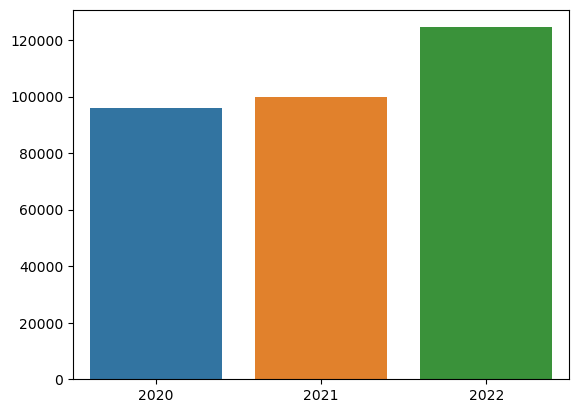

In [158]:
w2020 = ds.loc[(ds['work_year'] == 2020)]
w2021 = ds.loc[(ds['work_year'] == 2021)]
w2022 = ds.loc[(ds['work_year'] == 2022)]

year_salary = pd.DataFrame(columns=['2020','2021','2022'])
year_salary['2020'] = w2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = w2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = w2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values


sns.barplot(x= year_salary.columns, 
                            y=year_salary.values.tolist()[0])
                            

In [ ]:
## salary by experience level

In [159]:
ds.head(1)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Middle_Level,Full_Time,Data Scientist,79833,DE,0,DE,Large


In [162]:
salary_exp=ds.groupby(['experience_level','salary_in_usd']).size()
salary_exp

experience_level  salary_in_usd
Entry_Level       4000             1
                  5707             1
                  5882             1
                  6072             1
                  9272             1
                                  ..
Senior_Level      266400           1
                  276000           1
                  380000           1
                  405000           1
                  412000           1
Length: 434, dtype: int64

In [19]:


px.box(ds,x='experience_level',y='salary_in_usd',color='experience_level',template='ggplot2',labels={'experience_level':'Experience Level','salary_in_usd':'salary in usd'},title='<b>Data Sceince Salaries by Experience')




In [ ]:
## highest salary by job title

In [11]:
salary_job = ds.groupby(['salary_in_usd','job_title']).size().reset_index()
salary_job = salary_job[-20:]
fig = px.bar(x=salary_job['job_title'],y=salary_job['salary_in_usd'],text = salary_job['salary_in_usd'], 
                   color = salary_job['salary_in_usd'], color_discrete_sequence=px.colors.sequential.PuBu)

fig.update_layout(
    xaxis_title="Job Title",
    yaxis_title="Salaries ")
# fig.update_traces(width=0.9)
fig.update_layout(barmode = 'relative',xaxis_tickangle=-45, 
                  title='6.4. Top 20 Highest Salary by Job Title', template='plotly_dark',font = dict(size=17,family="Franklin Gothic"))

In [ ]:
## salary by employee type

In [13]:
px.box(ds,x='employment_type',y='salary_in_usd',color='employment_type',template='seaborn',labels={'employment_type':'Employment Type','salary_in_usd':'salary in usd'},title='<b>Data Sceince Salaries by type of employee')

In [ ]:
## salary by company size

In [15]:
px.box(ds,x='company_size',y='salary_in_usd',color='company_size',template='ggplot2',labels={'company_size':'Company Size','salary_in_usd':'salary in usd'},title='<b>Data Sceince Salaries by Company Size')